You’ll learn how to preprocess Time Series, build a simple LSTM model, train it, and use it to
make predictions

The steps we follow in this exercise are:

TIME SERIES
Recurrent Neural networks Time series prediction with LSTMs


## What is time series data?
 Collection of data points based on the time they were collected
 Recorded at regular time intervals

## What are the applications?
 Forcasting future time series value
 The price of something tomorrow, for eg.bitcoins
 Number of sales during a given season of the year
 Future heart faliure

## Proterties time series can have?
####  Stationarity: 
              when the mean and the variance remain constant over time. If the mean is varying over time, then it means time                   series has got a trend. You can avoid that, by log tranformations.

####     Seasonality: 
               If there are variations at specific time-frame. Eliminate that using differencing
               method.Differencing is a type of tranformation, that accomplishes:
                Making a time series stationary
                Stabilizing the mean of the time series

#### Autocorrelation:
               Refers to the correlation between the currrent value with a copy from previous time.


## Method we are using
  The two most commonly used gated RNNs are Long Short-Term Memory Networks and Gated Recurrent Unit Neural Networks.

Read for more information: https://en.wikipedia.org/wiki/Recurrent_neural_network
(https://en.wikipedia.org/wiki/Recurrent_neural_network)

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format ='retina'
sns.set(style='whitegrid', palette='muted',font_scale=1.5)
rcParams['figure.figsize']=16,10
RANDOM_SEED=42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


## Generate the 1000 values from sine function and using that as training data

In [4]:
time = np.arange(0,100,0.1)
## Add noise to the data, by adding random value to each data point, the random
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

In [5]:
sin

array([ 2.48357077e-01,  3.07012661e-02,  5.22513600e-01,  1.05703513e+00,
        2.72341655e-01,  3.62357060e-01,  1.35424888e+00,  1.02793505e+00,
        4.82618898e-01,  1.05460693e+00,  6.09762138e-01,  6.58342483e-01,
        1.05302022e+00,  6.91806309e-03,  1.22990814e-01,  7.16351222e-01,
        4.93158043e-01,  1.14878848e+00,  5.19835593e-01,  2.40148237e-01,
        1.64212181e+00,  7.50321216e-01,  8.42260506e-01,  3.33311191e-02,
        4.03271818e-01,  6.53933439e-01, -5.99954169e-02,  6.15228889e-01,
        3.46688052e-02,  9.34024543e-02, -1.59733298e-01,  9.67719755e-01,
       -6.51227558e-02, -6.86601159e-01,  1.55731354e-01, -9.61205053e-01,
       -3.38088646e-01, -1.50967120e+00, -1.27595092e+00, -5.89335541e-01,
       -3.87569205e-01, -7.32592970e-01, -9.29399914e-01, -1.06671778e+00,
       -1.69086307e+00, -1.33745222e+00, -1.22401039e+00, -4.71362144e-01,
       -8.24355464e-01, -1.86397269e+00, -7.96882290e-01, -1.11835582e+00,
       -1.22191566e+00, -

## visualize the data

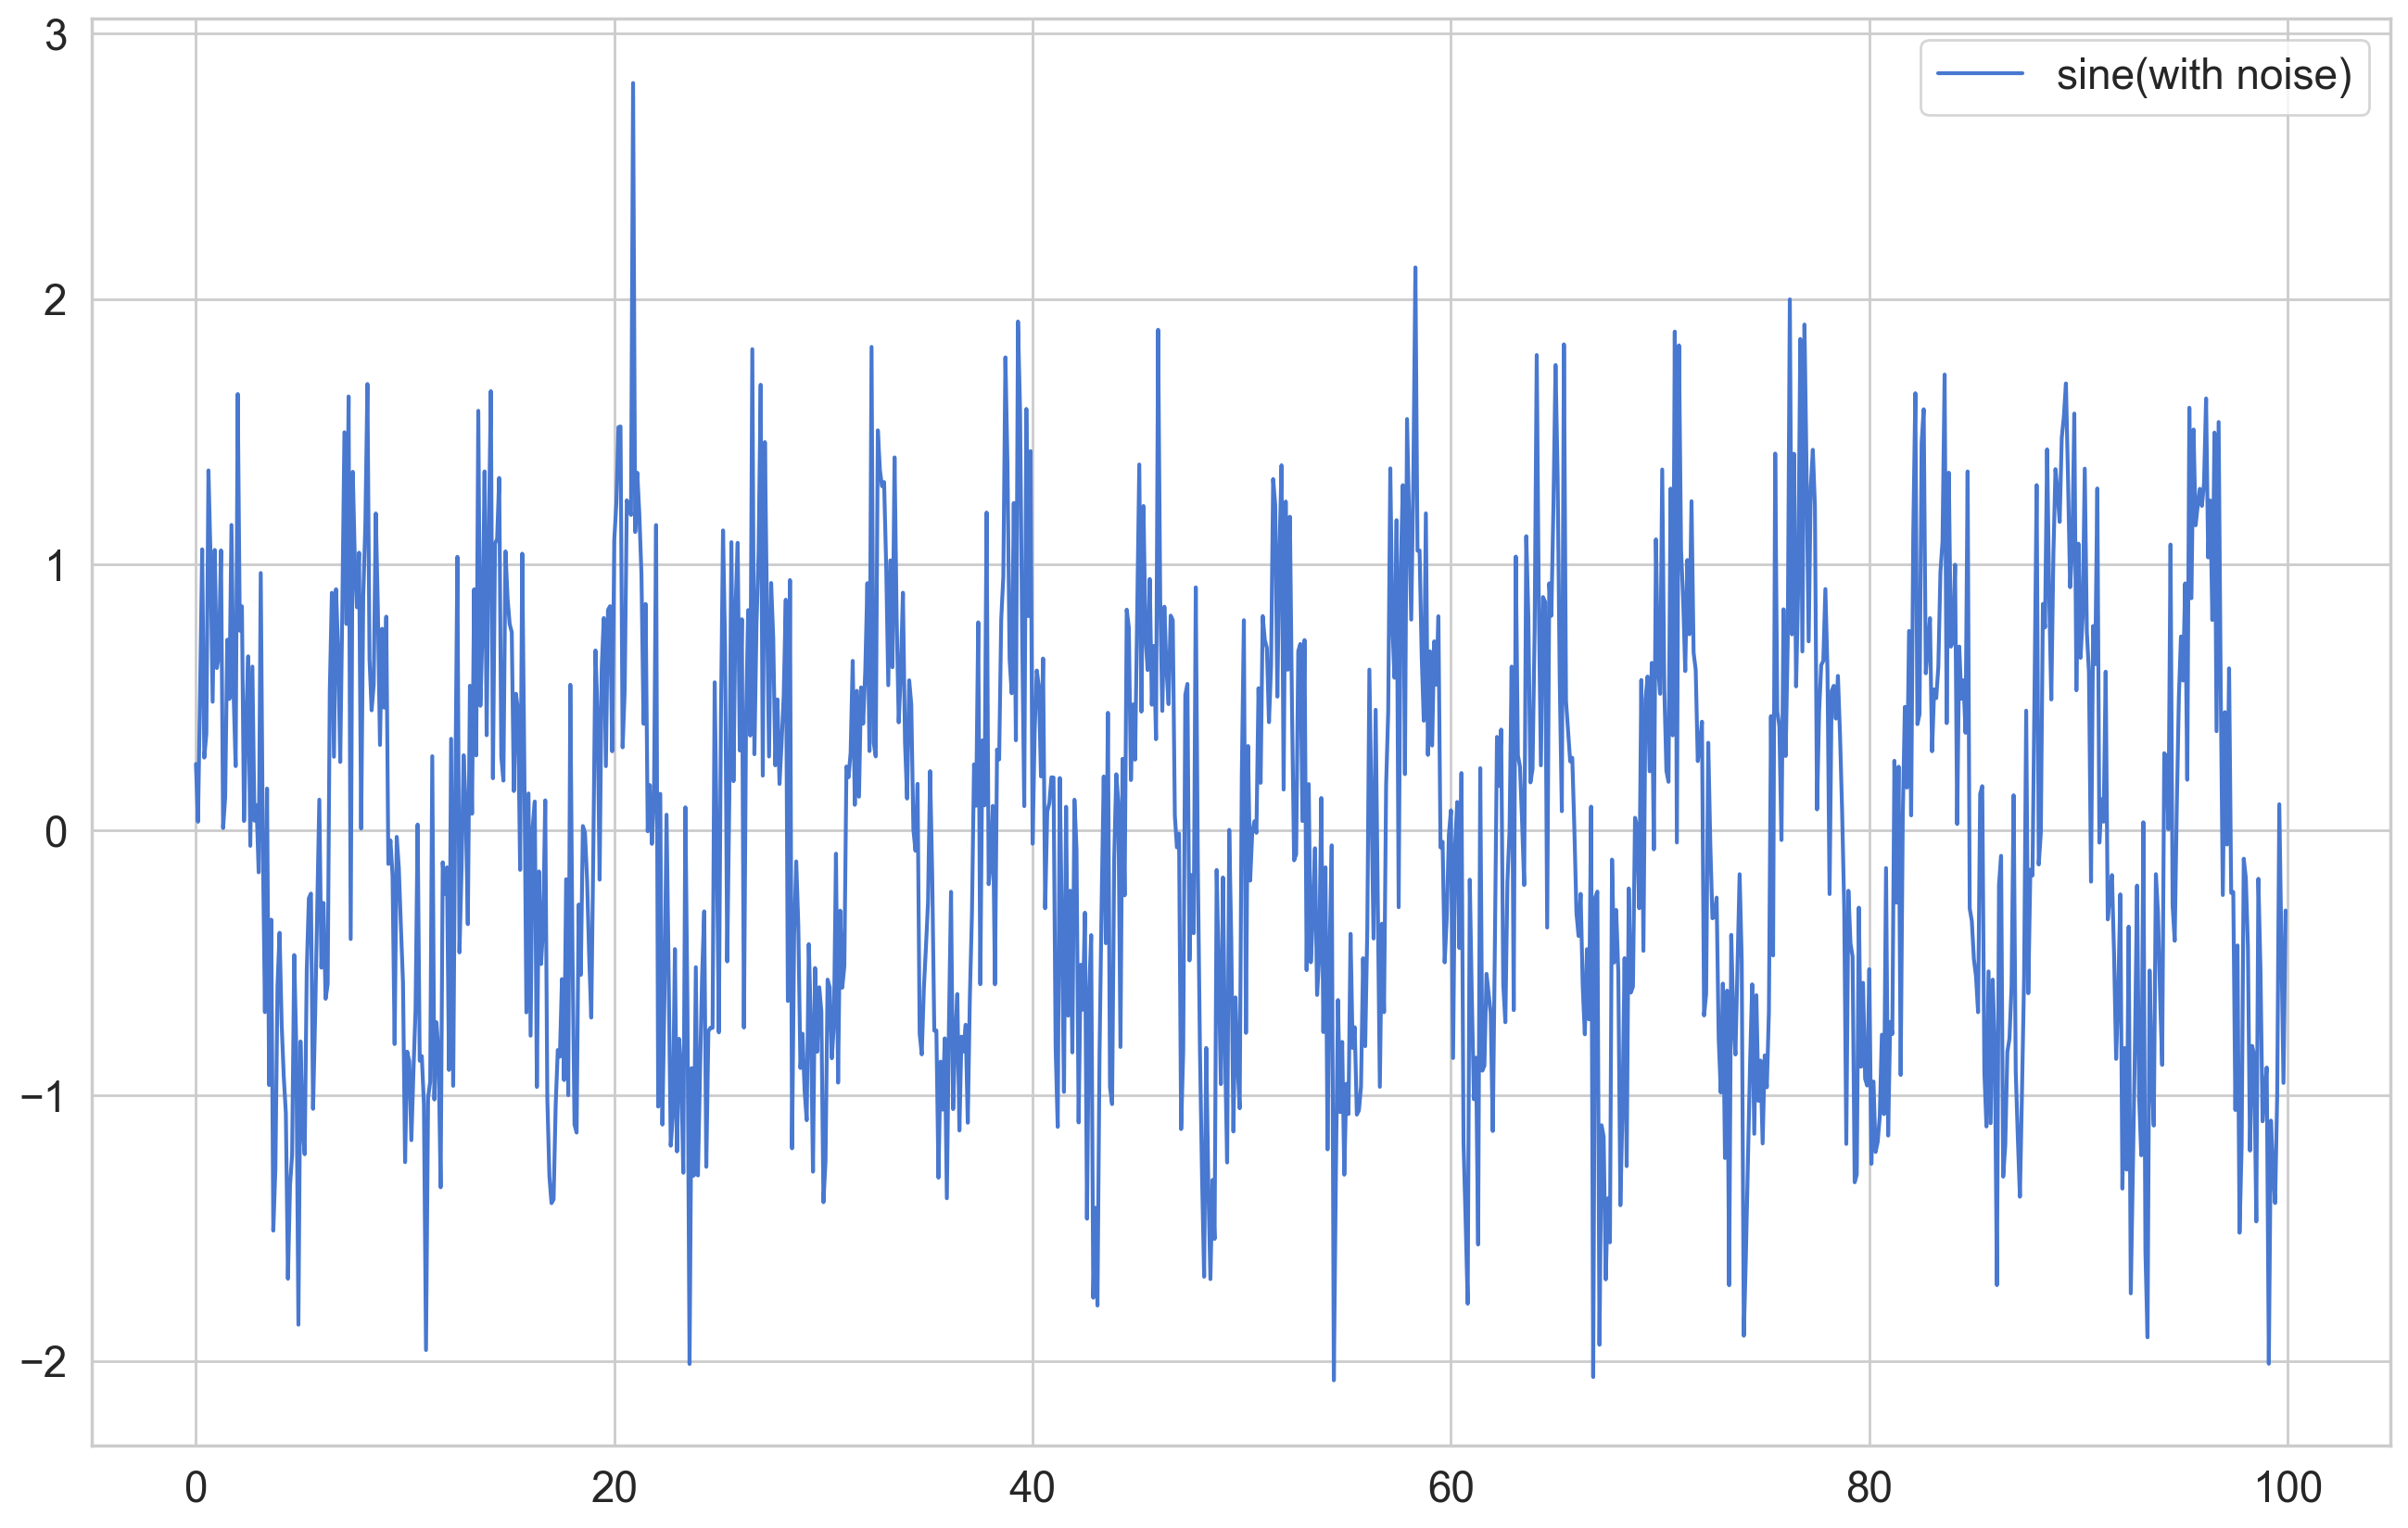

In [6]:
plt.plot(time,sin,label='sine(with noise)');
plt.legend();

## Data Prepocessing

In [8]:
df = pd.DataFrame(dict(sine = sin), index = time, columns = ['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


.“chop the data” into smaller sequences for our model

.But first, we’ll split it into training and test data

In [9]:
train_size = int(len(df)*0.8)
test_size = len(df) - train_size
train,test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train),len(test))

800 200


Getting the data ready for Time Series prediction, specifically using LSTMs, can be a
challenging task.

The basic idea is to forecast the value at the current time step based on the historical data
(i.e., data from n time steps prior).

To achieve this, a generic function can be used.

In [13]:
def create_dataset(X, y, time_steps = 1):
    """
    workss with single features(univariate) and multiple features
    
    """
    Xs, ys =[], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [14]:
## History of 10 time steps to make the sequences
time_steps = 10

In [15]:
# reshape to [samples, time_steps, n_features]
X_train,y_train = create_dataset(train, train.sine, time_steps)
X_test,y_test = create_dataset(test, test.sine, time_steps)
print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


## Modelling
 Train in keras
 
 LSTM layers are used in sequential model to make the predictions

In [16]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units = 128, 
    input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(units=1))
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False))

### LSTM expects the number of time steps and number of features

In [17]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 16,
                   validation_split = 0.1,
                   verbose = 1,
                   shuffle = False
                   )

Epoch 1/30
45/45 [==============================] - 10s 53ms/step - loss: 0.3862 - val_loss: 0.3514
Epoch 2/30
45/45 [==============================] - 1s 16ms/step - loss: 0.3243 - val_loss: 0.3213
Epoch 3/30
45/45 [==============================] - 1s 13ms/step - loss: 0.3187 - val_loss: 0.3197
Epoch 4/30
45/45 [==============================] - 1s 13ms/step - loss: 0.3178 - val_loss: 0.3173
Epoch 5/30
45/45 [==============================] - 1s 16ms/step - loss: 0.3169 - val_loss: 0.3157
Epoch 6/30
45/45 [==============================] - 1s 14ms/step - loss: 0.3161 - val_loss: 0.3142
Epoch 7/30
45/45 [==============================] - 1s 13ms/step - loss: 0.3155 - val_loss: 0.3129
Epoch 8/30
45/45 [==============================] - 0s 11ms/step - loss: 0.3148 - val_loss: 0.3116
Epoch 9/30
45/45 [==============================] - 1s 12ms/step - loss: 0.3141 - val_loss: 0.3103
Epoch 10/30
45/45 [==============================] - 1s 14ms/step - loss: 0.3134 - val_loss: 0.3091
Epoch 11

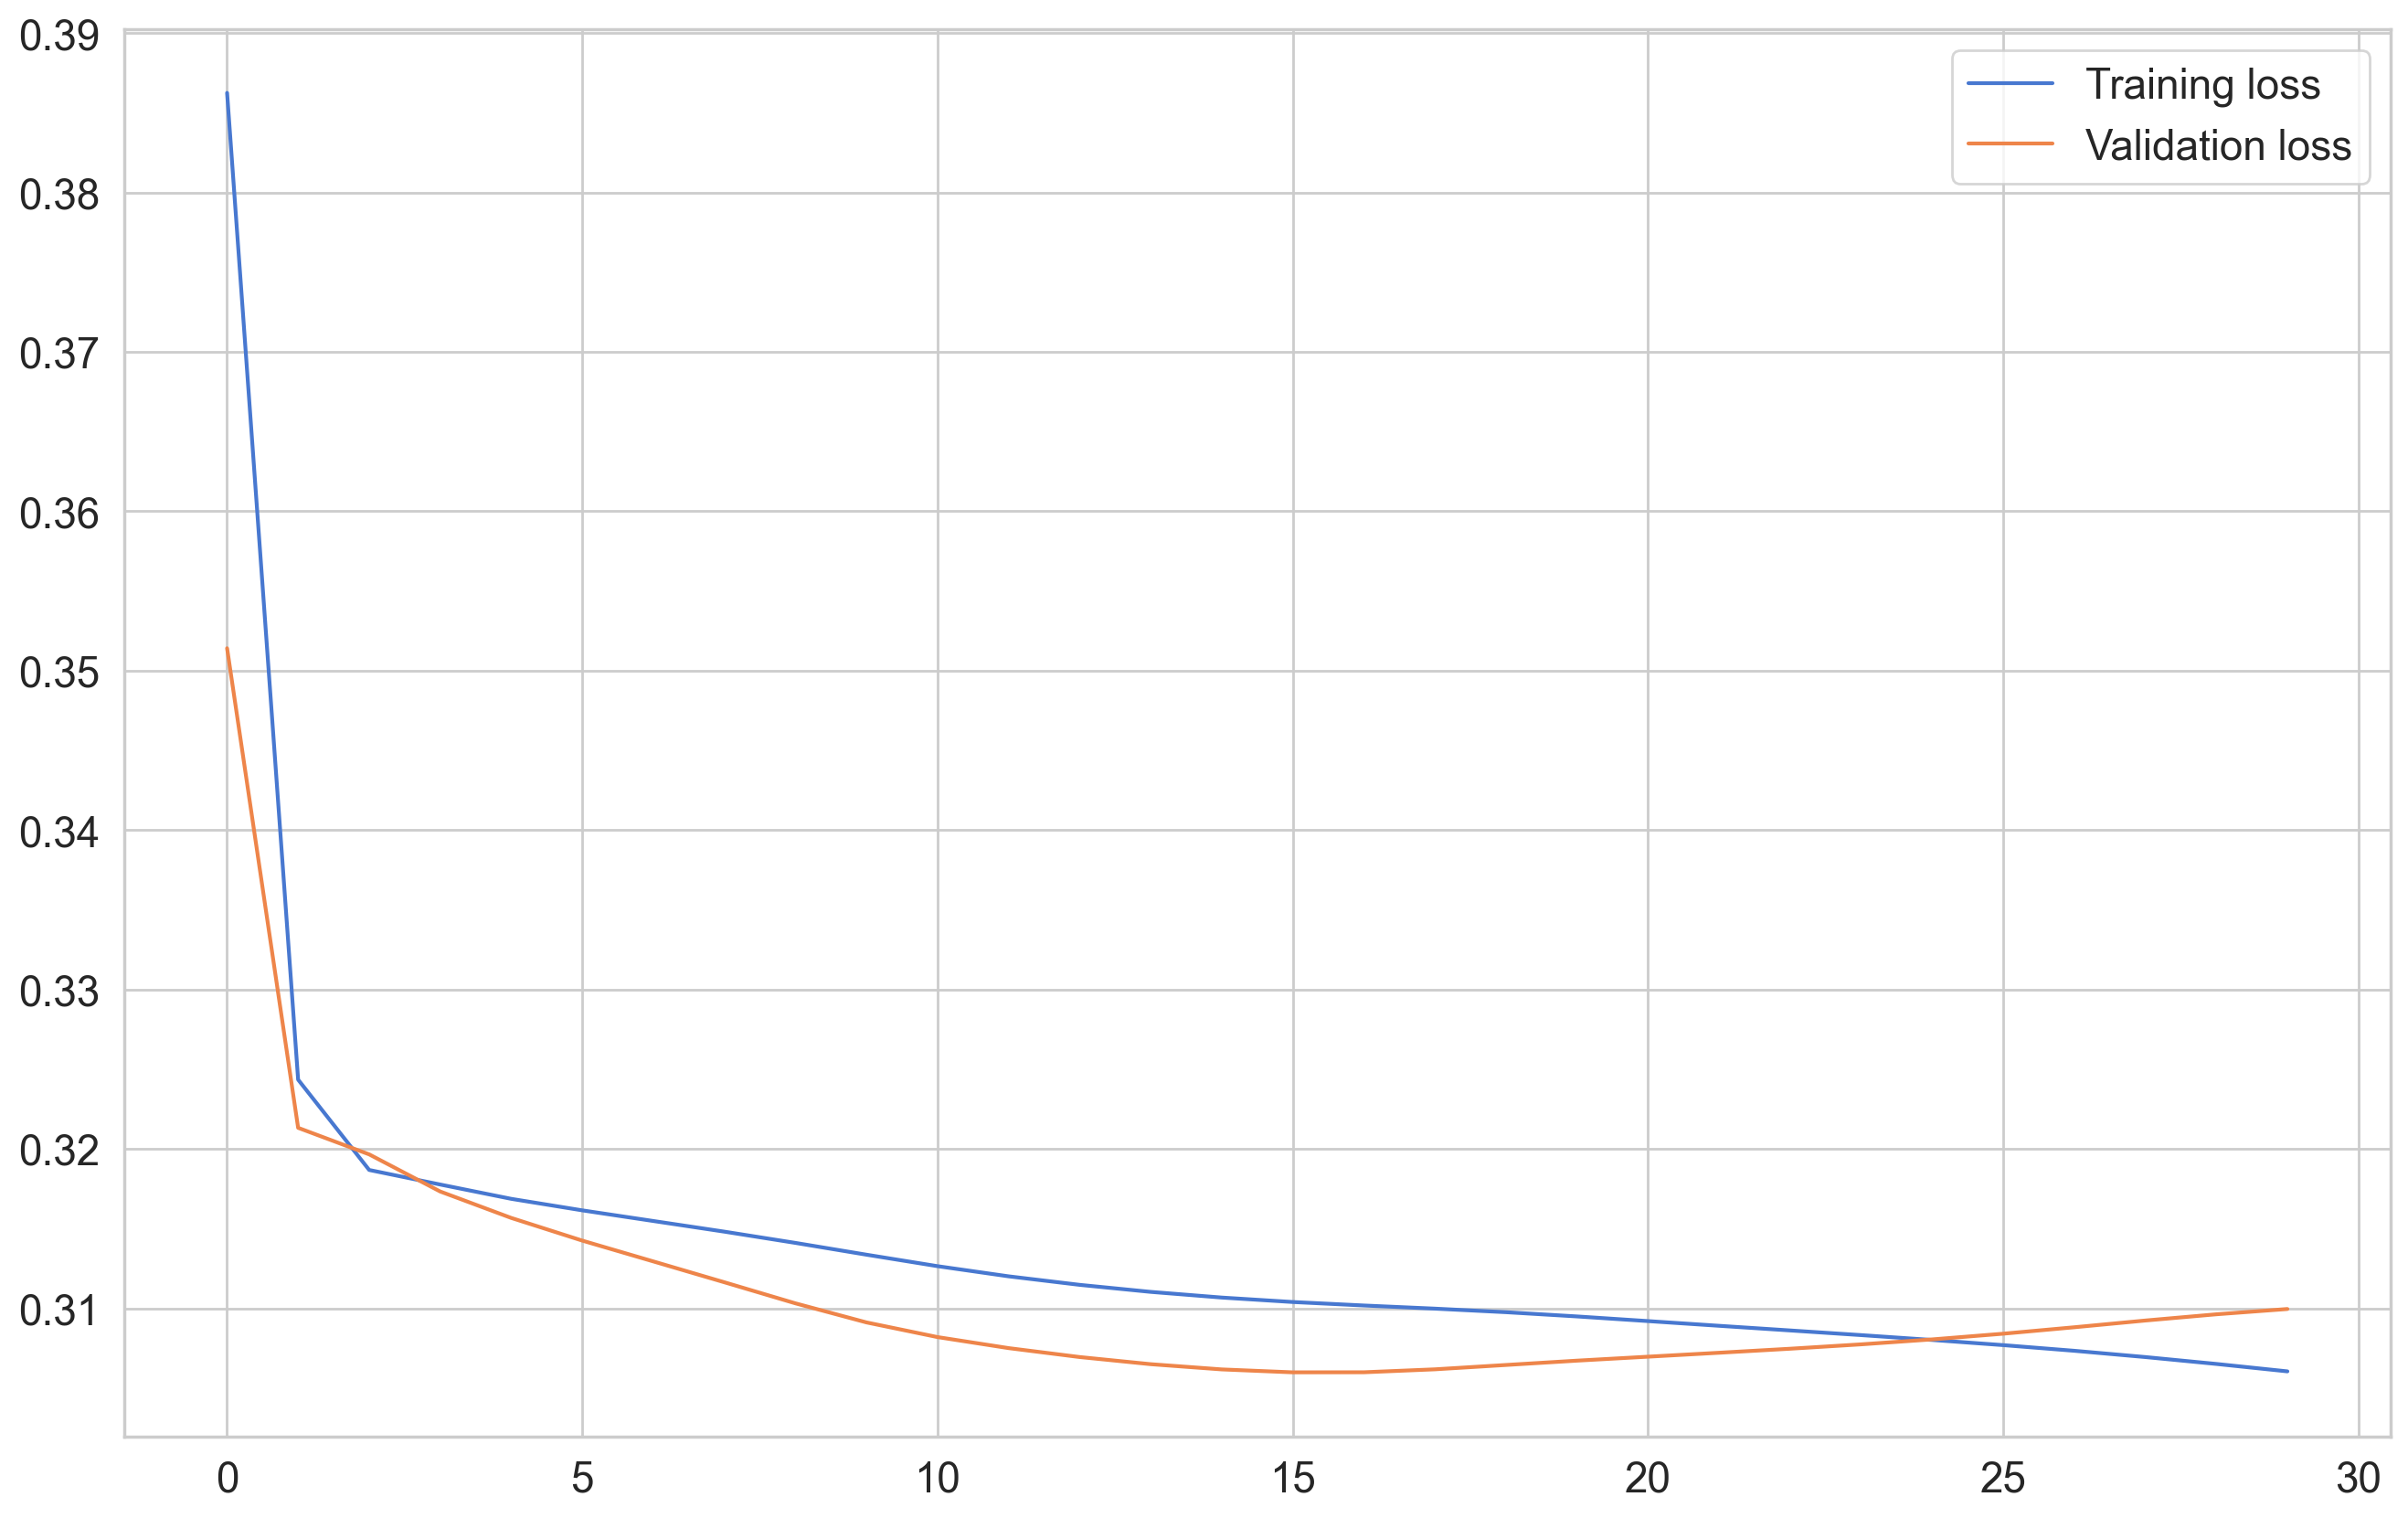

In [18]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.legend();

##### Our dataset is pretty simple and contains the randomness from our sampling
##### After about 15 epochs, the model is pretty much-done learning.

In [24]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 0s 10ms/step


array([[-0.69699395],
       [-0.62123287],
       [-0.6203547 ],
       [-0.40411747],
       [-0.38410088],
       [-0.19984865],
       [-0.34905332],
       [-0.19862576],
       [-0.00830246],
       [ 0.08351593],
       [ 0.29914793],
       [ 0.33914945],
       [ 0.5216577 ],
       [ 0.76113653],
       [ 0.87273884],
       [ 0.88449275],
       [ 0.8633679 ],
       [ 0.92700016],
       [ 0.9662118 ],
       [ 0.8754003 ],
       [ 0.82282495],
       [ 0.65928596],
       [ 0.578338  ],
       [ 0.5719415 ],
       [ 0.46178773],
       [ 0.44182596],
       [ 0.59714913],
       [ 0.8367893 ],
       [ 0.9122939 ],
       [ 0.9221627 ],
       [ 0.95382714],
       [ 0.8763205 ],
       [ 0.8160381 ],
       [ 0.6822775 ],
       [ 0.5349926 ],
       [ 0.46079624],
       [ 0.42059636],
       [ 0.44922718],
       [ 0.50825584],
       [ 0.49885228],
       [ 0.26948088],
       [-0.00798826],
       [-0.24301286],
       [-0.55309904],
       [-0.41523126],
       [-0

### Plot the predictions over true values from the time series

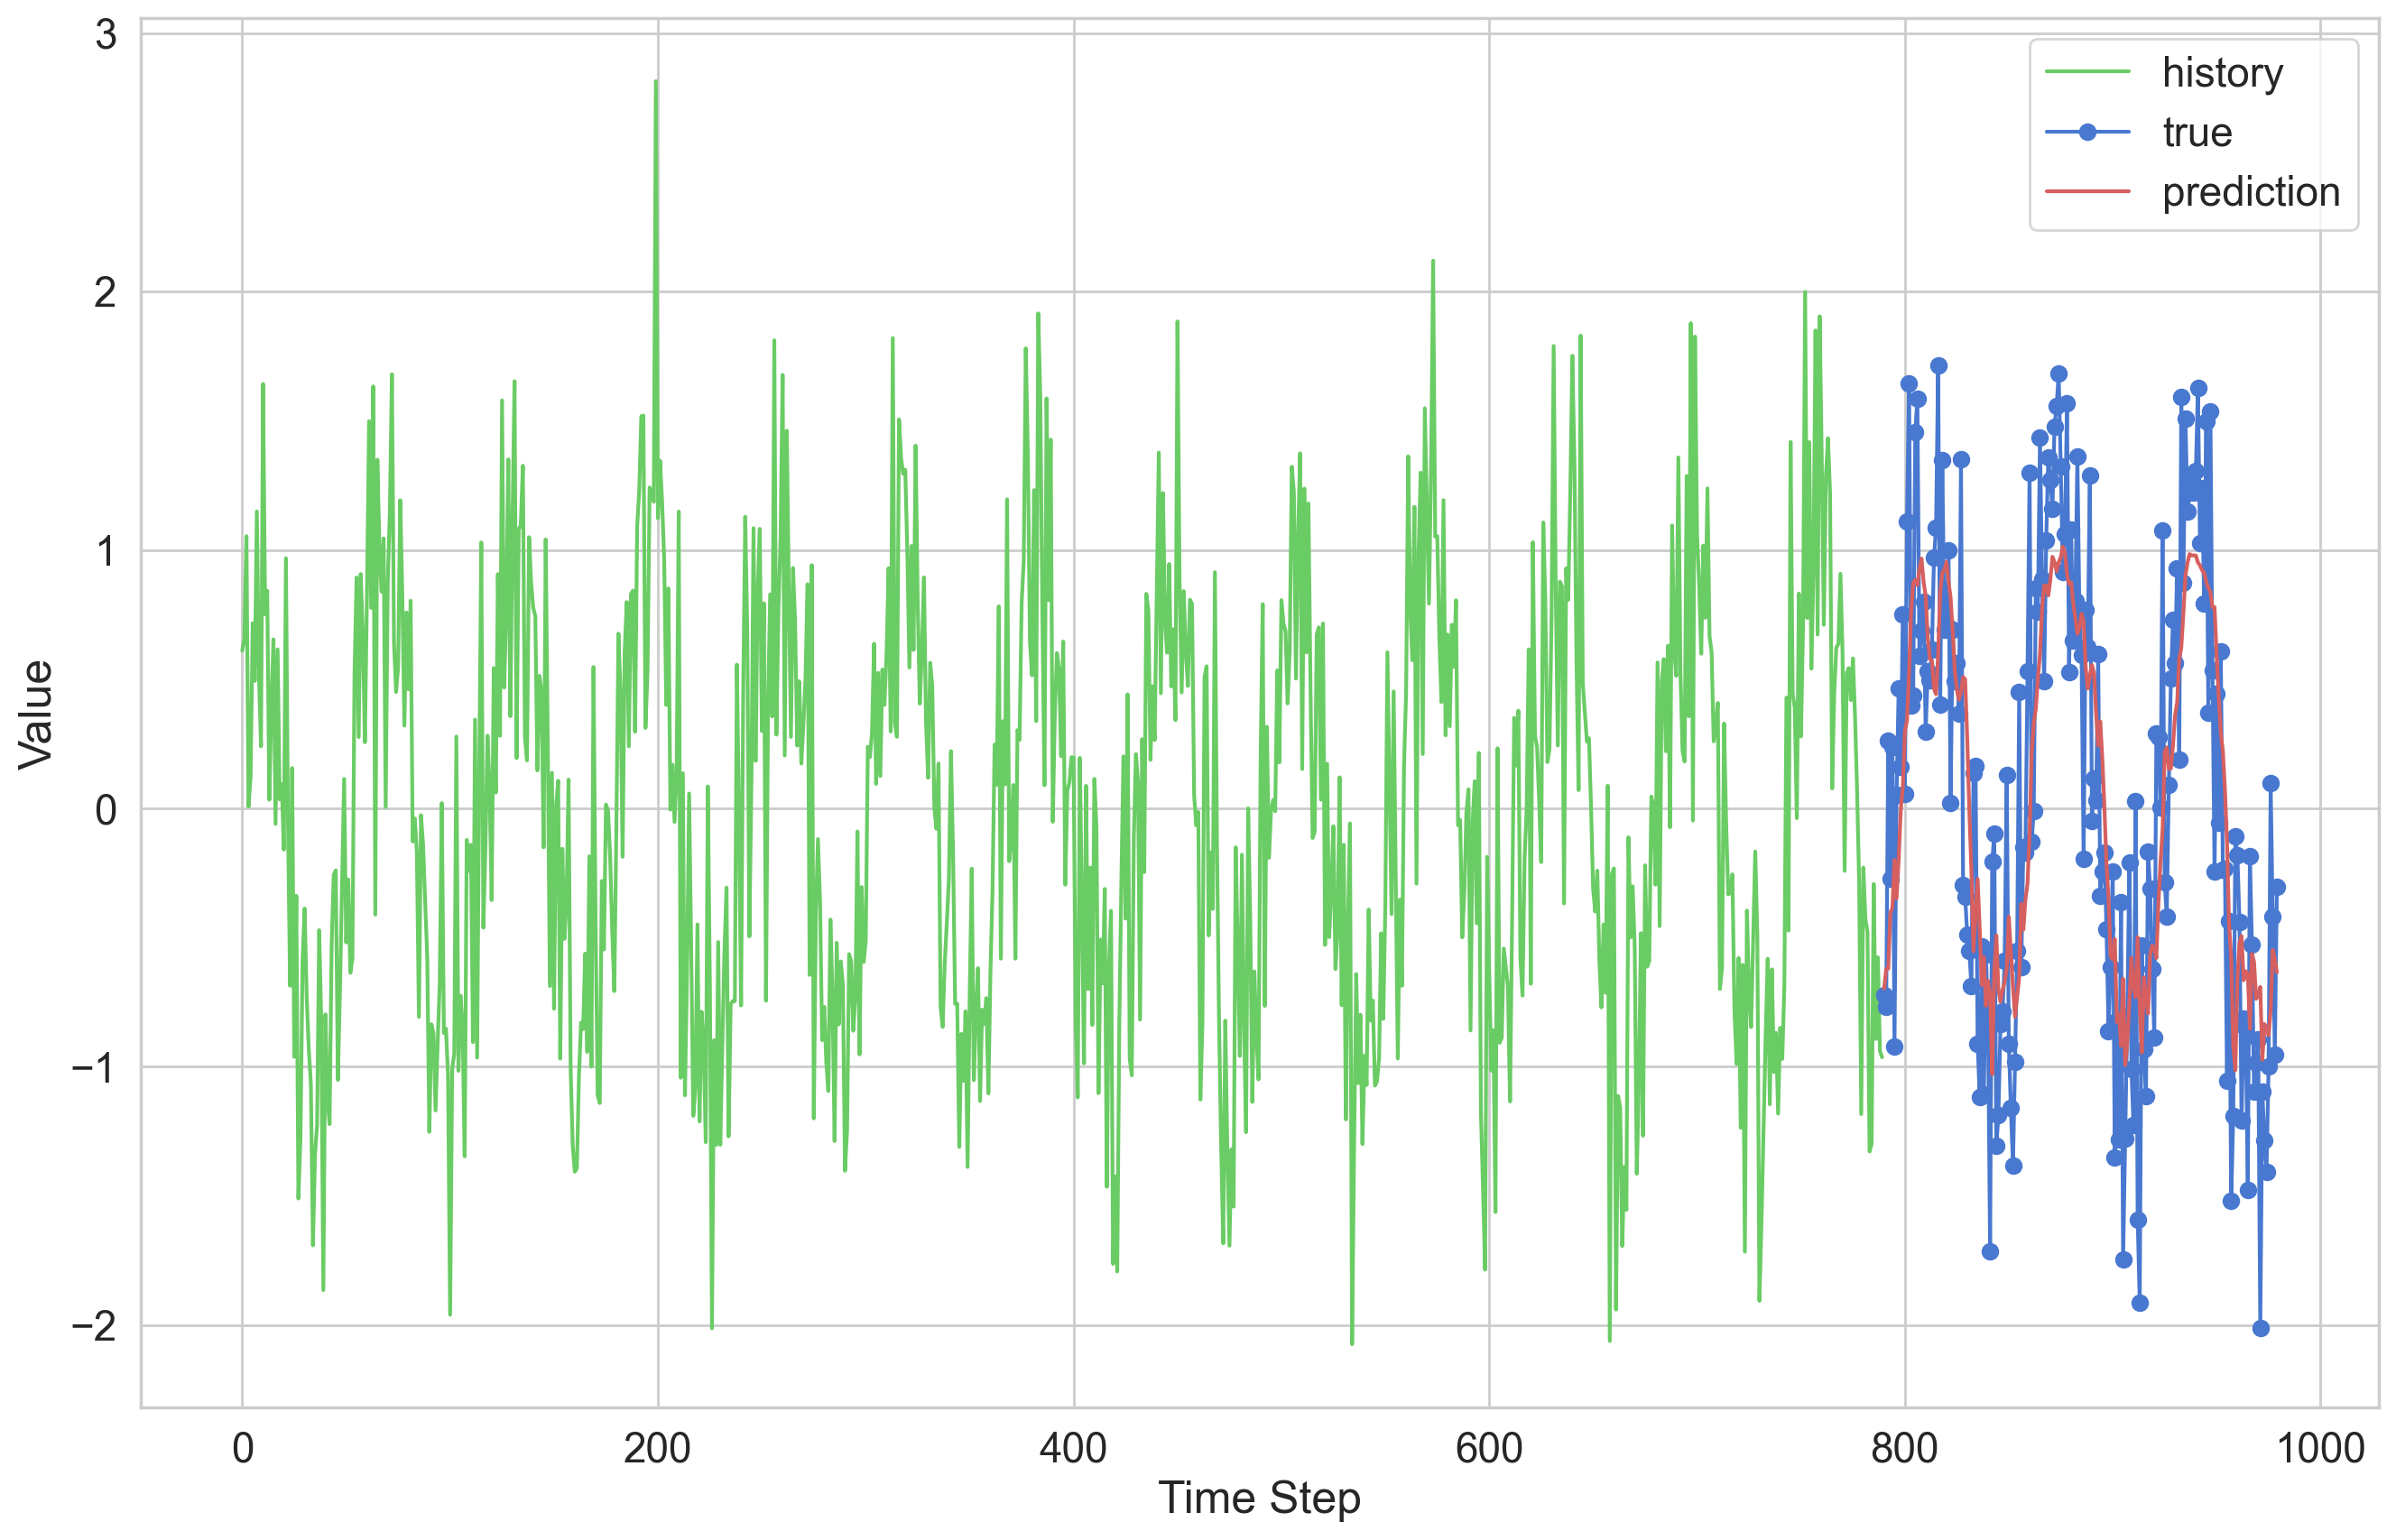

In [22]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label = 'history')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker = 'o', label = 'true')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label = 'prediction')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

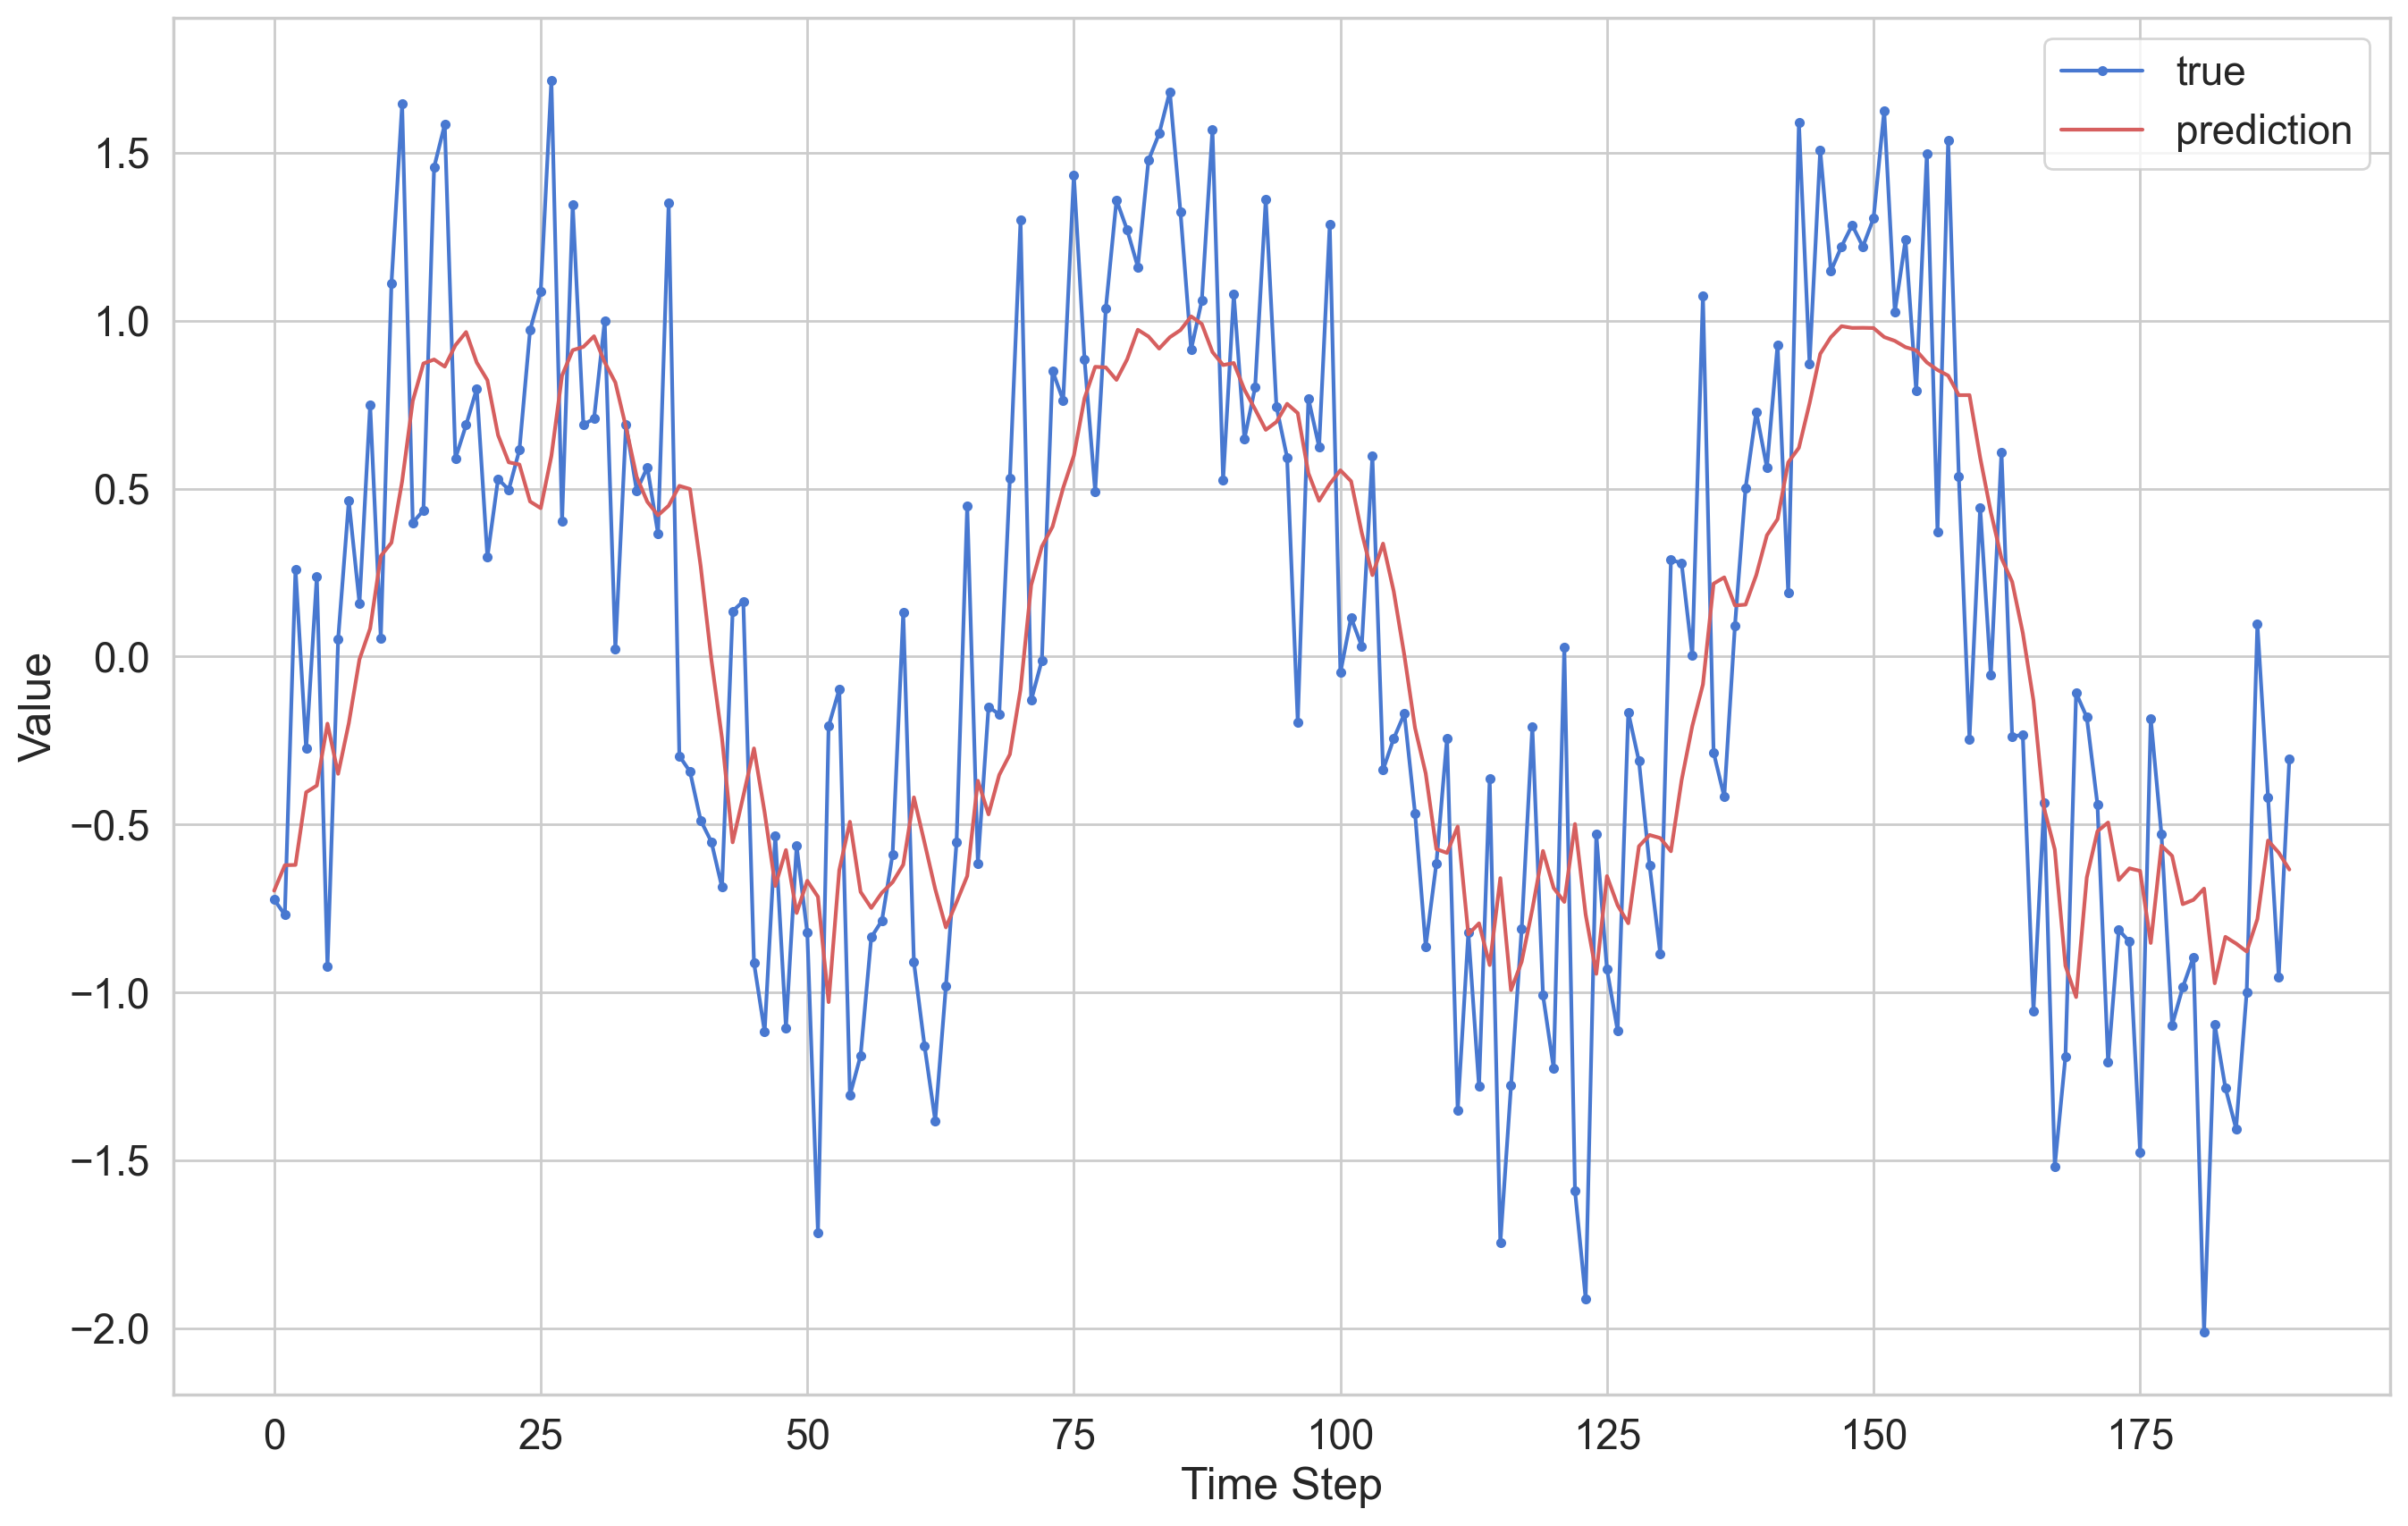

In [23]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()

### Interpretaions
##### The model appears to be doing a great job of capturing the general pattern of the data
###### Since, it failed to capture the random flucations, we can say the model generalizes well

### Conclusion
##### We learned preprocessing time series data, learned about the time series data, Using the LSTM to predict the time series